# Penarikan Kesimpulan dan Pengujian Hipotesis Data Matriks Kualitas Air

**Tugas Besar IF2220 Probabilitas dan Statistika**

Disusun oleh:

1. 13520047 Hana Fathiyah
2. 13520128 Bayu Samudra

---

## Requirement Modul Analisis
Pada tugas besar ini, kami menggunakan modul-modul sebagai berikut.

1. Numpy versi 1.22.3
2. Pandas versi 1.4.1
3. Seaborn versi 0.11.2
4. Matplotlib versi 3.5.1
5. Jupyterlab versi 3.3.2

Modul-modul tersebut dapat di-_install_ dengan perintah sebagai berikut.
```shell 
pip install -r requirements.txt
```
Berikut ini kami mencoba untuk melakukan _import library_ (pustaka) tersebut.

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

sns.set_theme()

## Persiapan Data
Diberikan suatu _dataset_ dengan nama `water_potability.csv`. Pada bagian ini, dataset tersebut akan di-_import_ ke dalam sebuah variabel yang diberi nama `data`

In [301]:
data = pd.read_csv("water_potability.csv")
data.head()

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Berikut ini adalah metadata dari dataset yang telah diimport

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2010 non-null   int64  
 1   pH               2010 non-null   float64
 2   Hardness         2010 non-null   float64
 3   Solids           2010 non-null   float64
 4   Chloramines      2010 non-null   float64
 5   Sulfate          2010 non-null   float64
 6   Conductivity     2010 non-null   float64
 7   OrganicCarbon    2010 non-null   float64
 8   Trihalomethanes  2010 non-null   float64
 9   Turbidity        2010 non-null   float64
 10  Potability       2010 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 172.9 KB


## Nomor 1: Deskripsi Statistika
Pada nomor 1 ini, kami mencari deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. 

In [303]:
data.describe()

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
count,2010.00000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000
mean,1005.50000,7.087193,195.969209,21904.673439,7.134322,333.211376,426.476708,14.357940,66.400717,3.969497,0.402985
std,580.38134,1.572803,32.643166,8625.397911,1.585214,41.211111,80.701872,3.325770,16.081109,0.780471,0.490620
min,1.00000,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,503.25000,6.090785,176.740657,15614.412962,6.138326,307.626986,366.619219,12.122530,55.949993,3.442882,0.000000
50%,1005.50000,7.029490,197.203525,20926.882155,7.142014,332.214113,423.438372,14.323286,66.482041,3.967374,0.000000
75%,1507.75000,8.053006,216.447589,27170.534649,8.109933,359.268147,482.209772,16.683562,77.294613,4.514663,1.000000
max,2010.00000,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


Data di atas menampilkan rata-rata (ditunjukkan dengan mean), median (ditunjukkan dengan baris 50%), standar deviasi (ditunjukkan dengan std), nilai minimum (ditunjukkan dengan min), nilai maksimum (ditunjukkan dengan max), dan kuartil (ditunjukkan dengan 25% (Q1), 50% (Q2), dan 75% (Q3)).

Selanjutnya akan dicari nilai variansi untuk setiap kolom pada dataset `water_potability.csv` tersebut

In [304]:
data.var()

id                 3.368425e+05
pH                 2.473709e+00
Hardness           1.065576e+03
Solids             7.439749e+07
Chloramines        2.512904e+00
Sulfate            1.698356e+03
Conductivity       6.512792e+03
OrganicCarbon      1.106075e+01
Trihalomethanes    2.586021e+02
Turbidity          6.091350e-01
Potability         2.407079e-01
dtype: float64

Selanjutnya, akan dicari nilai range untuk setiap kolom pada dataset `water_potability.csv` tersebut

In [305]:
data.max() - data.min()

id                  2009.000000
pH                    13.772501
Hardness             243.845890
Solids             56167.729801
Chloramines           11.736129
Sulfate              352.030642
Conductivity         551.722883
OrganicCarbon         24.806707
Trihalomethanes      115.422987
Turbidity              5.044749
Potability             1.000000
dtype: float64

Selanjutnya akan dicari nilai IQR untuk setiap kolom pada dataset `water_potability.csv` tersebut

In [306]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
q3 - q1

id                  1004.500000
pH                     1.962221
Hardness              39.706932
Solids             11556.121687
Chloramines            1.971607
Sulfate               51.641161
Conductivity         115.590553
OrganicCarbon          4.561031
Trihalomethanes       21.344620
Turbidity              1.071781
Potability             1.000000
dtype: float64

Selanjutnya akan dicari nilai skewness untuk setiap kolom pada dataset `water_potability.csv` tersebut

In [307]:
data.skew()

id                 0.000000
pH                 0.048535
Hardness          -0.085321
Solids             0.591011
Chloramines        0.013003
Sulfate           -0.045728
Conductivity       0.268012
OrganicCarbon     -0.020220
Trihalomethanes   -0.051383
Turbidity         -0.032266
Potability         0.395873
dtype: float64

Selanjutnya ditentukan nilai kurtosis untuk setiap kolom pada dataset `water_potability.csv` tersebut

In [308]:
data.kurtosis()

id                -1.200000
pH                 0.626904
Hardness           0.525480
Solids             0.337320
Chloramines        0.549782
Sulfate            0.786854
Conductivity      -0.237206
OrganicCarbon      0.031018
Trihalomethanes    0.223017
Turbidity         -0.049831
Potability        -1.845122
dtype: float64

Selanjutnya akan dicari nilai modus untuk setiap kolom pada dataset `water_potability.csv` tersebut

In [309]:
data.mode()

,id,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,OrganicCarbon,Trihalomethanes,Turbidity,Potability
0,1,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.0
1,2,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207,NaN
2,3,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101,NaN
3,4,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554,NaN
4,5,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,11.568768,286.567991,50793.898917,12.580026,458.441072,666.690618,23.569645,114.034946,6.307678,NaN
2006,2007,11.898078,287.975540,53735.899194,12.626900,460.107069,669.725086,23.604298,114.208671,6.357439,NaN
2007,2008,12.246928,300.292476,55334.702799,12.653362,475.737460,695.369528,23.917601,116.161622,6.389161,NaN
2008,2009,13.349889,306.627481,56351.396304,13.043806,476.539717,708.226364,24.755392,120.030077,6.494249,NaN


In [310]:
data.shape

(2010, 11)

Pada data di atas, terlihat bahwa nilai modus pada kolom selain kolom _portability_ memiliki nilai lebih dari satu. Lebih jauh lagi, setiap kolom numerik selain kolom _portability_ memiliki data yang unik sehingga semua nilai merupakan nilai modus.

## Nomor 2: Visualisasi
Pada nomor ini, akan ditampilkan visualisasi distribusi plot untuk setiap kolom numerik

### Data pH
Berikut ini adalah histogram untuk data pH pada dataset `water_portability.csv`

<AxesSubplot:xlabel='pH', ylabel='Count'>

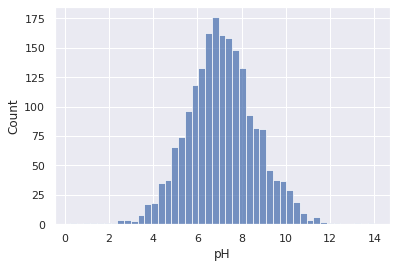

In [311]:
sns.histplot(data,x="pH")

Berikut ini adalah boxplot untuk data pH pada dataset `water_portability.csv`

<AxesSubplot:xlabel='pH'>

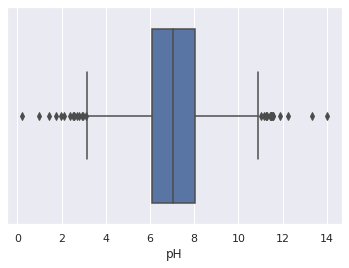

In [312]:
sns.boxplot(data = data, x = "pH")

### Data Hardness
Berikut ini adalah histogram untuk data Hardness pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Hardness', ylabel='Count'>

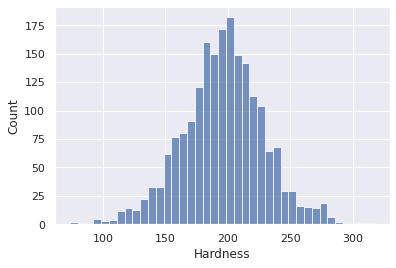

In [313]:
sns.histplot(data,x="Hardness")

Berikut ini adalah boxplot untuk data Hardness pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Hardness'>

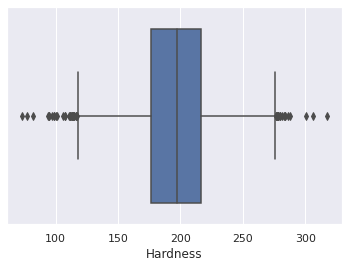

In [314]:
sns.boxplot(data = data, x = "Hardness")

### Data Solids
Berikut ini adalah histogram untuk data Solids pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Solids', ylabel='Count'>

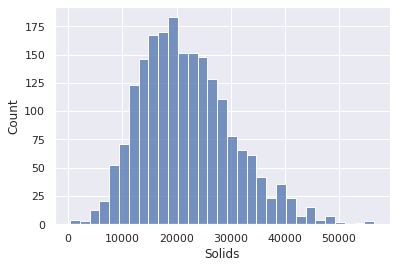

In [315]:
sns.histplot(data,x="Solids")

Berikut ini adalah boxplot untuk data Solids pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Solids'>

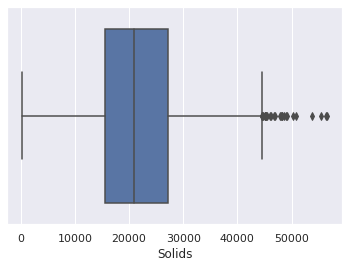

In [316]:
sns.boxplot(data = data, x = "Solids")

### Data Chloramines
Berikut ini adalah histogram untuk data Chloramines pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Chloramines', ylabel='Count'>

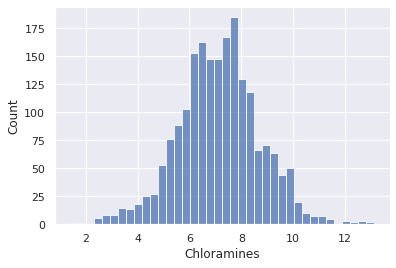

In [317]:
sns.histplot(data,x="Chloramines")

Berikut ini adalah boxplot untuk data Chloramines pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Chloramines'>

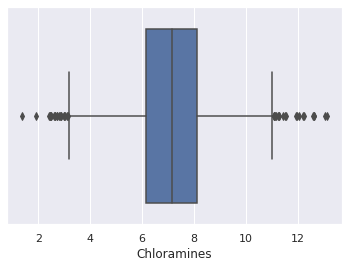

In [318]:
sns.boxplot(data = data, x = "Chloramines")

### Data Sulfate
Berikut ini adalah histogram untuk data Sulfate pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Sulfate', ylabel='Count'>

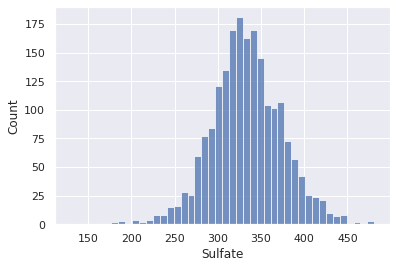

In [319]:
sns.histplot(data,x="Sulfate")

Berikut ini adalah boxplot untuk data Sulfate pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Sulfate'>

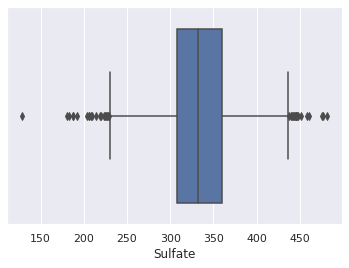

In [320]:
sns.boxplot(data = data, x = "Sulfate")

### Data Conductivity
Berikut ini adalah histogram untuk data Conductivity pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Conductivity', ylabel='Count'>

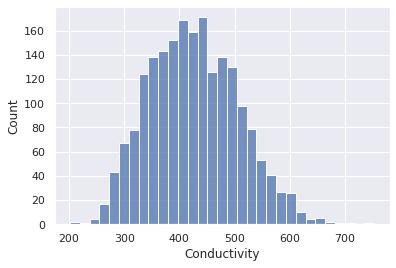

In [321]:
sns.histplot(data,x="Conductivity")

Berikut ini adalah boxplot untuk data Conductivity pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Conductivity'>

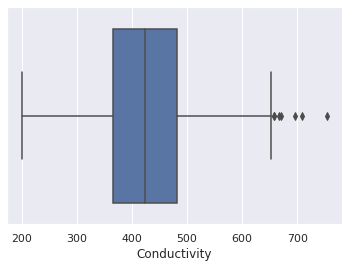

In [322]:
sns.boxplot(data = data, x = "Conductivity")

### Data OrganicCarbon
Berikut ini adalah histogram untuk data OrganicCarbon pada dataset `water_portability.csv`

<AxesSubplot:xlabel='OrganicCarbon', ylabel='Count'>

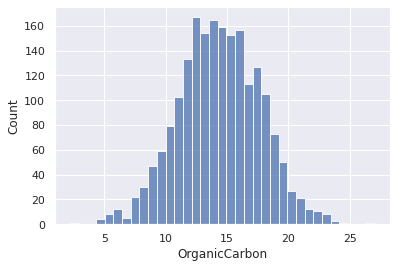

In [323]:
sns.histplot(data,x="OrganicCarbon")

Berikut ini adalah boxplot untuk data OrganicCarbon pada dataset `water_portability.csv`

<AxesSubplot:xlabel='OrganicCarbon'>

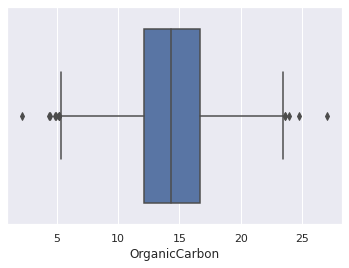

In [324]:
sns.boxplot(data = data, x = "OrganicCarbon")

### Data Trihalomethanes
Berikut ini adalah histogram untuk data Trihalomethanes pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Count'>

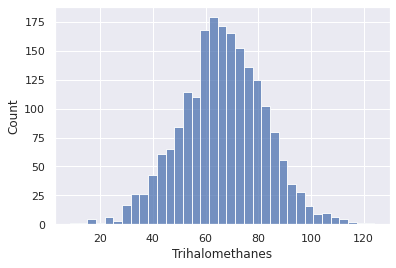

In [325]:
sns.histplot(data,x="Trihalomethanes")

Berikut ini adalah boxplot untuk data Trihalomethanes pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Trihalomethanes'>

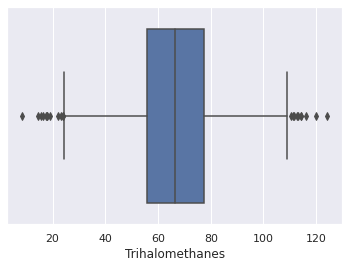

In [326]:
sns.boxplot(data = data, x = "Trihalomethanes")

### Data Turbidity
Berikut ini adalah histogram untuk data Turbidity pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

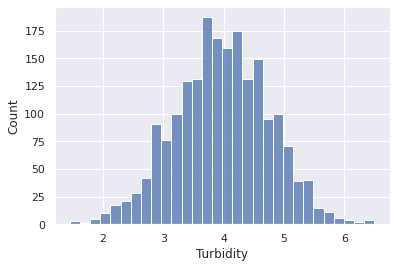

In [327]:
sns.histplot(data,x="Turbidity")

Berikut ini adalah boxplot untuk data Turbidity pada dataset `water_portability.csv`

<AxesSubplot:xlabel='Turbidity'>

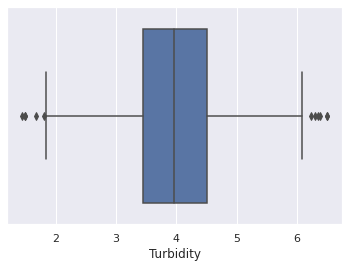

In [328]:
sns.boxplot(data = data, x = "Turbidity")

## Nomor 3: Tes Distribusi Normal
Pada bagian ini, akan dites apakah setiap kolom berdistribusi normal atau tidak. Kolom yang  akan dianalisis adalah kolom numerik, yaiur kolom 2 sampai dengan kolom 10.

### Metode Tes

Metode pengetesan akan dilakukan dengan dua cara, yaitu metode grafik dan statistik. 

#### Metode Grafik

Pada metode grafik, kami akan menggunakan QQ Plot dengan histogram. Pada tahap ini kami hanya mengamati seberapa dekat suatu kolom dengan normalnya.

Pembuatan grafik QQ dapat dilakukan dengan menjadikan setiap data merupakan quantiles dari semua data. Setelah itu, setiap quantiles dihitung korespondensinya terhadap tabel normal. Setelah itu akan dilakukan plotting menggunakan scatter plot dan dibuat regresinya. Apabila kebanyakan titik berada pada garis, maka data berdistribusi normal.

Berikut ini adalah fungsi yang akan membantu membuat QQ Plot

In [329]:
def QQ_Plot(data):
  dataset = np.sort(data)
  norm = scipy.stats.norm()
  normalDataset = np.array([
    norm.ppf((i+0.5)/len(dataset)) for i in range(len(dataset))
  ])

  sns.regplot(x=normalDataset, y=dataset)
  plt.xlabel("Normal Quantiles")
  plt.ylabel("Data Quantiles")

#### Metode Statistik

Pada metode statistik, kami menggunakan D'Agostino-Pearson Omnibus test untuk pengujian statistik. Pengetesan akan dilakukan dengan menggunakan pengujian hipotestis. 

Berikut ini adalah hipotesinya:

1.  Hipotesis nol ($H_0$) dari pengetesan ini adalah kolom berdistribusi normal.
2.  Hipotesis slternatif ($H_1$) dari pengetesan ini adalah kolom tidak berdistribusi normal.

Tingkat signifikansi yang digunakan adalah $\alpha = 0.05$


In [330]:
alpha = 0.05


Berikut ini adalah langkah pengujian statistik yang dilakukan:

1. Kurtosis dan juga skewness dari sebuah kolom perlu dihitung terlebih dahulu.
2. Menghitung error standard untuk skewness. Rumus untuk perhitungan skewness standard error adalah sebagai berikut:
$$
s.e = \sqrt{\frac{6n(n-1)}{(n-2)(n+1)(n+3)}}
$$
3. Menghitung error standar untuk kurtosis. Rumus untuk melakukan perhitungan ini adalah sebagai berikut:
$$
k.e = 2\cdot(s.e)\cdot\sqrt{\frac{n^2-1}{(n-3)(n+5)}}
$$
4. Perlu dihtung standar score untu skewness. Berikut ini adalah rumusnya:
$$
z_s = \frac{Sk}{s.e}
$$
5. Perlu dihitung standar error untuk kurtosis. Berikut ini adalah rumusnya:
$$
z_k = \frac{Kur}{k.e}
$$
6. Jumlah kuadrat dari Nilai dari standar skor untuk skewness dan kurtosis dapat didekatkan dengan distribusi chi-square derajat dua.
$$
z_x^2+z_k^2 \approx \chi^2_{\alpha}
$$
Oleh karena itu, nilai p dapat dihitung dengan mencari distribusi dari chi-square berderajat 2.

Proses diatas dapat dilakukan dengan menggunakan library dari scipy,  yaitu `scipy.stat.normaltest`.

Pada langkah terakhir, akan diperiksa apakah nilai p kurang dari level signifikansi. Bila kurang, maka hipotesis $H_0$ dapat ditolak.

### Data pH

Pada bagian ini, akan dicoba untuk melakukan test normal pada data pH. Berikut ini adalah histogram dan juga QQ plot dari data pH.

Text(0.5, 1.0, 'QQ Plot pH')

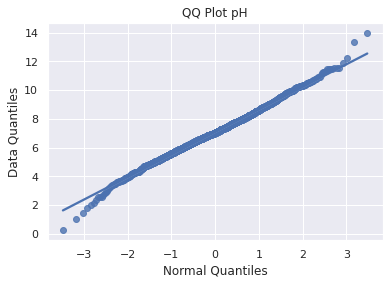

In [331]:
QQ_Plot(data["pH"])
plt.title("QQ Plot pH")

Text(0.5, 1.0, 'Histogram data pH')

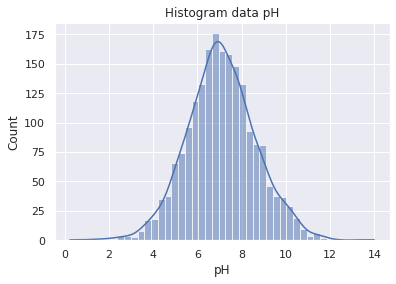

In [332]:
sns.histplot(data=data, x="pH", kde=True)
plt.title("Histogram data pH")

Dari kedua grafik diatas, data pH terlihat data bisa jadi tidak berdistribusi normal. Hal ini terlihat pada ujung kiri dan ujung kanan QQ Plot yang menjauh dari garis.

Pada bagian selanjutnya, data akan diuji menggunakan pendekatan statistik.

In [333]:
_, p = scipy.stats.normaltest(data["pH"])
print(f"p = {p}")

if p < alpha:
  print("Data tidak berdistribusi normal")
else:
  print("Data berdistribusi normal")

p = 2.6514813346797777e-05
Data tidak berdistribusi normal


### Data Hardness

Pada bagian ini, akan dicoba untuk melakukan test normal pada data Hardness. Berikut ini adalah histogram dan juga QQ plot dari data Hardness.

Text(0.5, 1.0, 'QQ Plot Hardness')

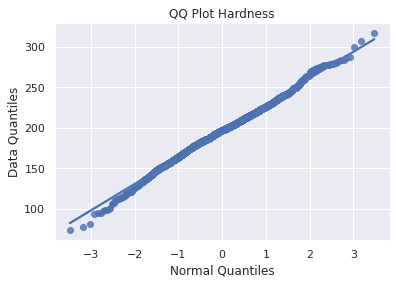

In [334]:
QQ_Plot(data["Hardness"])
plt.title("QQ Plot Hardness")

Text(0.5, 1.0, 'Histogram data Hardness')

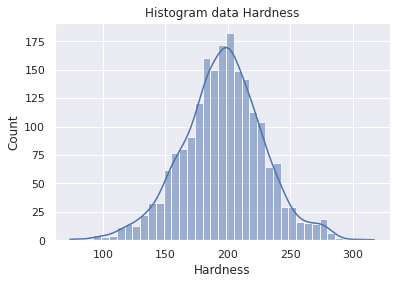

In [335]:
sns.histplot(data=data, x="Hardness", kde=True)
plt.title("Histogram data Hardness")

Dari kedua grafik diatas, data pH terlihat data bisa jadi tidak berdistribusi normal. Hal ini terlihat pada ujung kiri dan ujung kanan QQ Plot yang menjauh dari garis.

Pada bagian selanjutnya, data akan diuji menggunakan pendekatan statistik.

In [336]:
_, p = scipy.stats.normaltest(data["Hardness"])
print(f"p = {p}")

if p < alpha:
  print("Data tidak berdistribusi normal")
else:
  print("Data berdistribusi normal")

p = 0.00013442428699593753
Data tidak berdistribusi normal


Berdasarkan pengujian statistik, terlihat bahwa data tidak berdistribusi normal. Hal ini dikarenakan nilai $p < 0.05$ sehingga hipotesis $H_0$ dapat ditolak.

Kesimpulan dari pengujian ini adalah data Hardness bukan merupakan data yang berdistribusi normal

### Data Solids

Pada bagian ini, akan dicoba untuk melakukan test normal pada data Solids. Berikut ini adalah histogram dan juga QQ plot dari data Solids.

Text(0.5, 1.0, 'QQ Plot Solids')

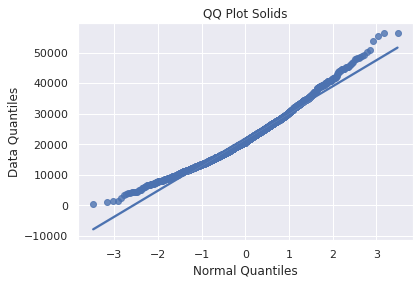

In [337]:
QQ_Plot(data["Solids"])
plt.title("QQ Plot Solids")

Text(0.5, 1.0, 'Histogram data Solids')

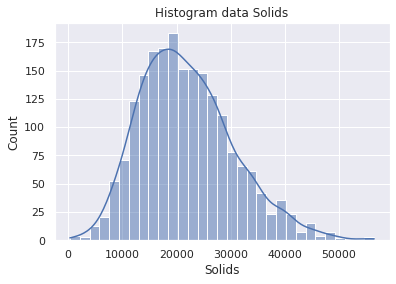

In [338]:
sns.histplot(data=data, x="Solids", kde=True)
plt.title("Histogram data Solids")

Dari kedua grafik diatas, data pH terlihat data bisa jadi tidak berdistribusi normal. Hal ini terlihat cukup banyak titik yang  tidak berada pada garis.

Pada bagian selanjutnya, data akan diuji menggunakan pendekatan statistik.

In [339]:
_, p = scipy.stats.normaltest(data["Solids"])
print(f"p = {p}")

if p < alpha:
  print("Data tidak berdistribusi normal")
else:
  print("Data berdistribusi normal")

p = 2.0796613688739523e-24
Data tidak berdistribusi normal


Berdasarkan pengujian statistik, terlihat bahwa data tidak berdistribusi normal. Hal ini dikarenakan nilai $p < 0.05$ sehingga hipotesis $H_0$ dapat ditolak.

Kesimpulan dari pengujian ini adalah data Solids bukan merupakan data yang berdistribusi normal

### Data Chloramines

Pada bagian ini, akan dicoba untuk melakukan test normal pada data Chloramines. Berikut ini adalah histogram dan juga QQ plot dari data Chloramines.

Text(0.5, 1.0, 'QQ Plot Chloramines')

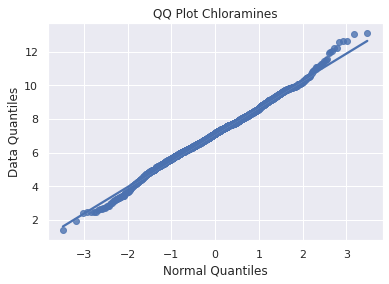

In [340]:
QQ_Plot(data["Chloramines"])
plt.title("QQ Plot Chloramines")

Text(0.5, 1.0, 'Histogram data Chloramines')

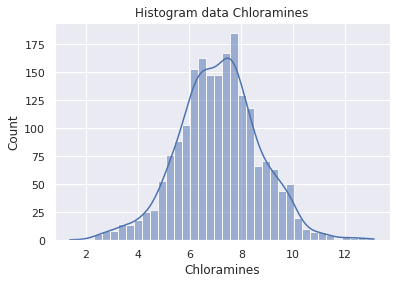

In [341]:
sns.histplot(data=data, x="Chloramines", kde=True)
plt.title("Histogram data Chloramines")

Dari kedua grafik diatas, data Chloramines terlihat data bisa jadi tidak berdistribusi normal. Hal ini terlihat cukup banyak titik yang  tidak berada pada garis.

Pada bagian selanjutnya, data akan diuji menggunakan pendekatan statistik.

In [342]:
_, p = scipy.stats.normaltest(data["Chloramines"])
print(f"p = {p}")

if p < alpha:
  print("Data tidak berdistribusi normal")
else:
  print("Data berdistribusi normal")

p = 0.0002504831654753917
Data tidak berdistribusi normal


Berdasarkan pengujian statistik, terlihat bahwa data tidak berdistribusi normal. Hal ini dikarenakan nilai $p < 0.05$ sehingga hipotesis $H_0$ dapat ditolak.

Kesimpulan dari pengujian ini adalah data Chloramines bukan merupakan data yang berdistribusi normal

### Data Sulfate

Pada bagian ini, akan dicoba untuk melakukan test normal pada data Sulfate. Berikut ini adalah histogram dan juga QQ plot dari data Sulfate.

Text(0.5, 1.0, 'QQ Plot Sulfate')

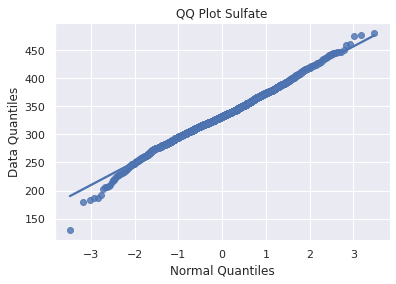

In [343]:
QQ_Plot(data["Sulfate"])
plt.title("QQ Plot Sulfate")

Text(0.5, 1.0, 'Histogram data Sulfate')

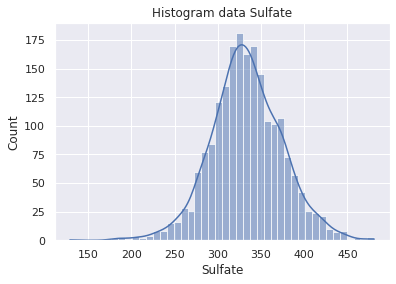

In [344]:
sns.histplot(data=data, x="Sulfate", kde=True)
plt.title("Histogram data Sulfate")

Dari kedua grafik diatas, data Chloramines terlihat data bisa jadi tidak berdistribusi normal. Hal ini terlihat data miring ke sumbu x negatif pada histogram dan pada ujung-ujung plot QQ menjauh terhadap garis.

Pada bagian selanjutnya, data akan diuji menggunakan pendekatan statistik.

In [345]:
_, p = scipy.stats.normaltest(data["Sulfate"])
print(f"p = {p}")

if p < alpha:
  print("Data tidak berdistribusi normal")
else:
  print("Data berdistribusi normal")

p = 4.4255936678013136e-07
Data tidak berdistribusi normal


Berdasarkan pengujian statistik, terlihat bahwa data tidak berdistribusi normal. Hal ini dikarenakan nilai $p < 0.05$ sehingga hipotesis $H_0$ dapat ditolak.

Kesimpulan dari pengujian ini adalah data Sulfate bukan merupakan data yang berdistribusi normal

### Data Conductivity

Pada bagian ini, akan dicoba untuk melakukan test normal pada data Conductivity. Berikut ini adalah histogram dan juga QQ plot dari data Conductivity.

Text(0.5, 1.0, 'QQ Plot Conductivity')

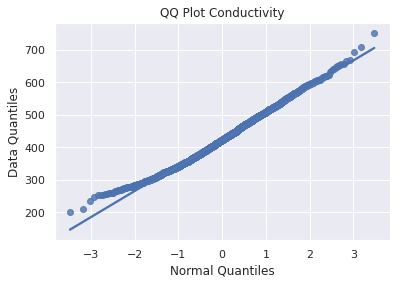

In [346]:
QQ_Plot(data["Conductivity"])
plt.title("QQ Plot Conductivity")

Text(0.5, 1.0, 'Histogram data Conductivity')

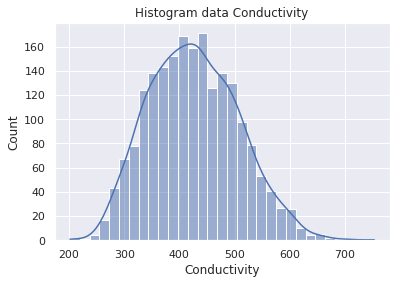

In [347]:
sns.histplot(data=data, x="Conductivity", kde=True)
plt.title("Histogram data Conductivity")

Dari kedua grafik diatas, data Chloramines terlihat data bisa jadi tidak berdistribusi normal. Hal ini terlihat data miring ke sumbu x positif pada histogram dan pada ujung-ujung plot QQ menjauh terhadap garis.

Pada bagian selanjutnya, data akan diuji menggunakan pendekatan statistik.

In [348]:
_, p = scipy.stats.normaltest(data["Conductivity"])
print(f"p = {p}")

if p < alpha:
  print("Data tidak berdistribusi normal")
else:
  print("Data berdistribusi normal")

p = 4.3901807828784666e-07
Data tidak berdistribusi normal


Berdasarkan pengujian statistik, terlihat bahwa data tidak berdistribusi normal. Hal ini dikarenakan nilai $p < 0.05$ sehingga hipotesis $H_0$ dapat ditolak.

Kesimpulan dari pengujian ini adalah data Conductivity bukan merupakan data yang berdistribusi normal

### Data OrganicCarbon

Pada bagian ini, akan dicoba untuk melakukan test normal pada data OrganicCarbon. Berikut ini adalah histogram dan juga QQ plot dari data OrganicCarbon.

Text(0.5, 1.0, 'QQ Plot OrganicCarbon')

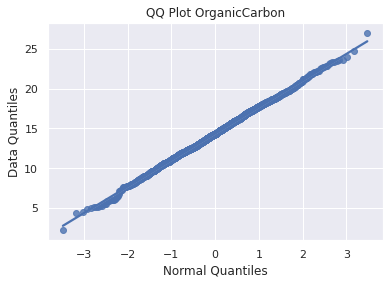

In [349]:
QQ_Plot(data["OrganicCarbon"])
plt.title("QQ Plot OrganicCarbon")

Text(0.5, 1.0, 'Histogram data OrganicCarbon')

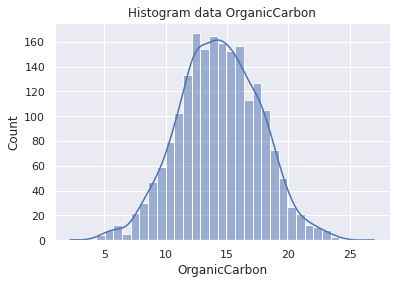

In [350]:
sns.histplot(data=data, x="OrganicCarbon", kde=True)
plt.title("Histogram data OrganicCarbon")

Dari kedua grafik diatas, data OrganicCarbon terlihat mendekati bentuk normal. Hal ini dapat terlihat bahwa pada QQ plot, sebagian besar titik berada pada garis. Oleh karena itu, dapat disimpulkan bahwa pH merupakan data yang berkemungkinan berdistribusi normal.

Pada bagian selanjutnya, data akan diuji menggunakan pendekatan statistik.

In [351]:
_, p = scipy.stats.normaltest(data["OrganicCarbon"])
print(f"p = {p}")

if p < alpha:
  print("Data tidak berdistribusi normal")
else:
  print("Data berdistribusi normal")

p = 0.8825496581408284
Data berdistribusi normal


Berdasarkan pengujian statistik, terlihat bahwa berdistribusi normal. Hal ini ditunjukan bahwa nilai $p > 0.05$. Oleh karena itu, hipotesis $H_0$ tidak dapat ditolak.

Kesimpulan dari pengujian ini adalah data OrganicCarbon merupakan data yang berdistribusi normal

### Data Trihalomethanes

Pada bagian ini, akan dicoba untuk melakukan test normal pada data Trihalomethanes. Berikut ini adalah histogram dan juga QQ plot dari data Trihalomethanes.

Text(0.5, 1.0, 'QQ Plot pH')

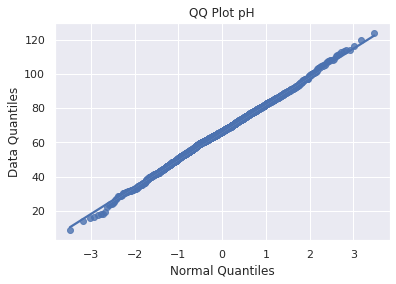

In [352]:
QQ_Plot(data["Trihalomethanes"])
plt.title("QQ Plot pH")

Text(0.5, 1.0, 'Histogram data Trihalomethanes')

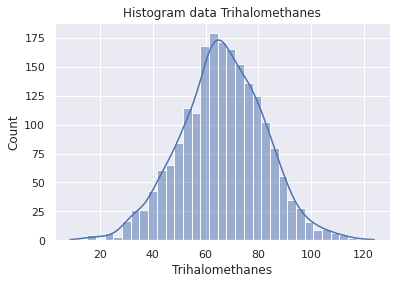

In [353]:
sns.histplot(data=data, x="Trihalomethanes", kde=True)
plt.title("Histogram data Trihalomethanes")

Dari kedua grafik diatas, data Trihalomethanes terlihat mendekati bentuk normal. Hal ini dapat terlihat bahwa pada QQ plot, sebagian besar titik berada pada garis. Oleh karena itu, dapat disimpulkan bahwa Trihalomethanes merupakan data yang berkemungkinan berdistribusi normal.

Pada bagian selanjutnya, data akan diuji menggunakan pendekatan statistik.

In [354]:
_, p = scipy.stats.normaltest(data["Trihalomethanes"])
print(f"p = {p}")

if p < alpha:
  print("Data tidak berdistribusi normal")
else:
  print("Data berdistribusi normal")

p = 0.1043598441875204
Data berdistribusi normal


Berdasarkan pengujian statistik, terlihat bahwa berdistribusi normal. Hal ini ditunjukan bahwa nilai $p > 0.05$. Oleh karena itu, hipotesis $H_0$ tidak dapat ditolak.

Kesimpulan dari pengujian ini adalah data Trihalomethanes merupakan data yang berdistribusi normal

### Data Turbidity

Pada bagian ini, akan dicoba untuk melakukan test normal pada data Turbidity. Berikut ini adalah histogram dan juga QQ plot dari data Turbidity.

Text(0.5, 1.0, 'QQ Plot Turbidity')

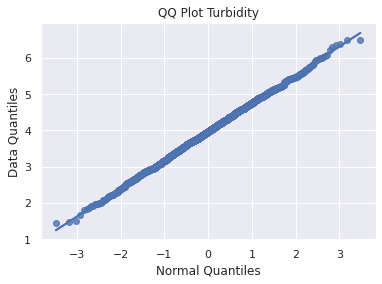

In [355]:
QQ_Plot(data["Turbidity"])
plt.title("QQ Plot Turbidity")

Text(0.5, 1.0, 'Histogram data Turbidity')

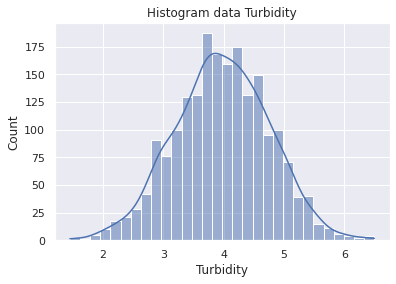

In [356]:
sns.histplot(data=data, x="Turbidity", kde=True)
plt.title("Histogram data Turbidity")

Dari kedua grafik diatas, data Turbidity terlihat mendekati bentuk normal. Hal ini dapat terlihat bahwa pada QQ plot, sebagian besar titik berada pada garis. Oleh karena itu, dapat disimpulkan bahwa Turbidity merupakan data yang berkemungkinan berdistribusi normal.

Pada bagian selanjutnya, data akan diuji menggunakan pendekatan statistik.

In [357]:
_, p = scipy.stats.normaltest(data["Turbidity"])
print(f"p = {p}")

if p < alpha:
  print("Data tidak berdistribusi normal")
else:
  print("Data berdistribusi normal")

p = 0.7694717369961169
Data berdistribusi normal


Berdasarkan pengujian statistik, terlihat bahwa berdistribusi normal. Hal ini ditunjukan bahwa nilai $p > 0.05$. Oleh karena itu, hipotesis $H_0$ tidak dapat ditolak.

Kesimpulan dari pengujian ini adalah data Turbidity merupakan data yang berdistribusi normal

## Nomor 4: Uji Hipotesis 1 Sampel

Pada nomor ini, akan dilakukan uji sampel terhadap beberapa variabel.

### Soal 4.a.

Akan diuji hipotesis apakah populasi memiliki nilai rata-rata pH diatas 7.
Berikut ini adalah boxplot dari data pH.

<AxesSubplot:xlabel='pH'>

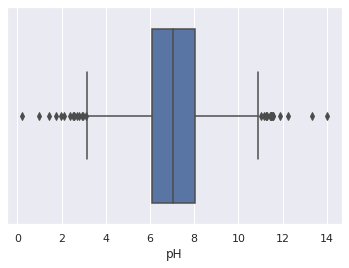

In [358]:
sns.boxplot(data = data, x = "pH")

#### Langkah 1 : Penentuan Hipotesis Nol

Pada soal ini, ditentukan bahwa hipotesis nol ($H_0$) adalah rata-rata pH populasi bernilai 7. Oleh karena itu, diambil

$$
H_0: \mu_{pH} = 7
$$

#### Langkah 2: Penentuan Hipotesis Alternatif

Diambil hipotesis alternatif dari permasalahan ini adalah rata-rata pH populasi bernilai lebih dari 7. Oleh karena itu, diambil

$$
H_1: \mu_{pH} > 7
$$

#### Langkah 3: Penentuan Nilai Signifikansi dan Daerah kritis
Diambil nilai signifikansi ($\alpha$) bernilai 5%. Akan dihitung nilai daerah kritisnya. Dikarenakan dilakukan proses pengujian pada rata-rata, maka digunakanlah distribusi t.

In [359]:
tValue = scipy.stats.t.ppf(1-0.05, data["pH"].size - 1)
tValue

1.6456124504017113

Oleh karena itu, daerah kritisnya adalah
$$
t > 1.6456
$$

#### Langkah 4: Pengujian Statistik

Akan dilakukan pengujian statistik. Akan dihitung nilai berikut
$$
t_0 = \frac{\bar{X}-\mu_0}{s/\sqrt{n}}
$$

yang dalam hal ini, $\bar{X}$ menyatakan rata-rata sampel, $\mu_0$ rata-rata yang sesuai dengan $H_0$, s adalah simpangan baku sampel, dan $n$ adalah jumlah sampel.

In [360]:
t_0 = (np.mean(data["pH"]) - 7)/(np.std(data["pH"], ddof=1)/np.sqrt(data["pH"].size))
t_0

2.485445147379887

Akan dihitung nilai $p$ dari data yang diketahui diatas

In [361]:
p = 1-scipy.stats.t.cdf(t_0,  data["pH"].size - 1)
p

0.006509872359240942

#### Langkah 5: Pengambilan Keputusan

Dikarenakan $p = 0.0065 < 0.05$ dan $t_0 > 1.6456$, maka hipotesis $H_0$ ditolak karena $t_0$ berada di daerah kritis. Oleh karena itu, nilai rata-rata pH lebih besar daripada 7.

### Soal 4.b.

Akan diuji hipotesis apakah populasi memiliki nilai rata-rata Hardness tidak sama dengan 205. Berikut ini adalah boxplot dari data Hardness.

<AxesSubplot:xlabel='Hardness'>

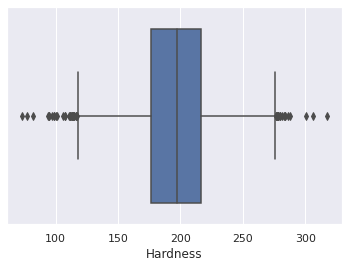

In [362]:
sns.boxplot(data = data, x = "Hardness")

#### Langkah 1 : Penentuan Hipotesis Nol

Pada soal ini, ditentukan bahwa hipotesis nol ($H_0$) adalah rata-rata Hardness populasi bernilai 205. Oleh karena itu, diambil

$$
H_0: \mu_{Hardness} = 205
$$

#### Langkah 2: Penentuan Hipotesis Alternatif

Diambil hipotesis alternatif dari permasalahan ini adalah rata-rata Hardness populasi bernilai tidak sama dengan 205. Oleh karena itu, diambil

$$
H_1: \mu_{Hardness} \neq 205
$$

#### Langkah 3: Penentuan Nilai Signifikansi dan Daerah kritis
Diambil nilai signifikansi ($\alpha$) bernilai 5%. Akan dihitung nilai daerah kritisnya. Dikarenakan dilakukan proses pengujian pada rata-rata, maka digunakanlah distribusi t.

In [363]:
t = scipy.stats.t
criticalVal = t.ppf(0.05/2, data["Hardness"].size - 1)
criticalVal

-1.9611455060885266

Oleh karena itu, daerah kritisnya adalah
$$
t > 1.961 \lor t < -1.961
$$

#### Langkah 4: Pengujian Statistik

Akan dilakukan pengujian statistik. Akan dihitung nilai berikut
$$
t_0 = \frac{\bar{X}-\mu_0}{s/\sqrt{n}}
$$

yang dalam hal ini, $\bar{X}$ menyatakan rata-rata sampel, $\mu_0$ rata-rata yang sesuai dengan $H_0$, s adalah simpangan baku sampel, dan $n$ adalah jumlah sampel.

In [364]:
t_0 = (np.mean(data["Hardness"]) - 205)/(np.std(data["Hardness"], ddof=1)/np.sqrt(data["Hardness"].size))
t_0

-12.403137170010732

Akan dihitung nilai $p$ dari data yang diketahui diatas

In [365]:
p = t.cdf(t_0, data["Hardness"].size - 1) * 2
p

4.299181043195824e-34

#### Langkah 5: Pengambilan Keputusan

Dikarenakan $p < 0.05$ dan $t_0 < -1.961$, maka hipotesis $H_0$ ditolak karena berada di dalam daerah kritis. Oleh karena itu, nilai rata-rata hardness tidak sama dengan 205.

### Soal 4.c.

Akan diuji hipotesis apakah rata-rata populasi dengan sampel 100 baris pertama kolom Solid bukan 21900. Berikut ini adalah boxplot dari 100 baris pertama kolom Solids.

<AxesSubplot:xlabel='Solids'>

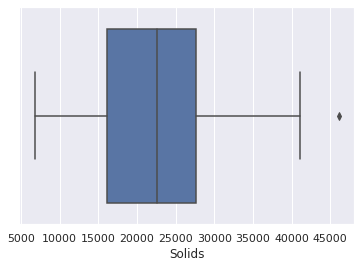

In [366]:
sns.boxplot(data = data[:100], x = "Solids")

 Berikut ini adalah pengambilan 100 data pertama. 

In [367]:
solid100 = data["Solids"].iloc[:100]
solid100.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: Solids
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes


In [368]:
solid100.head()

0    22018.417441
1    17978.986339
2    28748.687739
3    28749.716544
4    13672.091764
Name: Solids, dtype: float64

#### Langkah 1 : Penentuan Hipotesis Nol

Pada soal ini, ditentukan bahwa hipotesis nol ($H_0$) adalah rata-rata Hardness populasi bernilai 205. Oleh karena itu, diambil

$$
H_0: \mu_{solid} = 21900
$$

#### Langkah 2: Penentuan Hipotesis Alternatif

Diambil hipotesis alternatif dari permasalahan ini adalah rata-rata Hardness populasi bernilai tidak sama dengan 205. Oleh karena itu, diambil

$$
H_1: \mu_{Hardness} \neq 21900
$$

#### Langkah 3: Penentuan Nilai Signifikansi dan Daerah kritis
Diambil nilai signifikansi ($\alpha$) bernilai 5%. Akan dihitung nilai daerah kritisnya. Dikarenakan dilakukan proses pengujian pada rata-rata, maka digunakanlah distribusi normal.

In [369]:
t = scipy.stats.t
criticalVal = t.ppf(0.05/2, solid100.size - 1)
criticalVal

-1.9842169515086832

Oleh karena itu, daerah kritisnya adalah
$$
t > 1.984 \lor t < -1.984
$$

#### Langkah 4: Pengujian Statistik

Akan dilakukan pengujian statistik. Akan dihitung nilai berikut
$$
t_0 = \frac{\bar{X}-\mu_0}{s/\sqrt{n}}
$$

yang dalam hal ini, $\bar{X}$ menyatakan rata-rata sampel, $\mu_0$ rata-rata yang sesuai dengan $H_0$, s adalah simpangan baku sampel, dan $n$ adalah jumlah sampel.

In [370]:
t_0 = (np.mean(solid100) - 21900)/(np.std(solid100, ddof=1)/np.sqrt(solid100.size))
t_0

0.5636797715721551

Akan dihitung nilai $p$ dari data yang diketahui diatas

In [371]:
p = (1-t.cdf(t_0, solid100.size - 1))*2
p

0.5742467134052602

#### Langkah 5: Pengambilan Keputusan

Dikarenakan $p > 0.05$ dan $t_0 < 1.98$, maka hipotesis $H_0$ diterima karena berada di luar daerah kritis. Oleh karena itu, nilai rata-rata populasi dari sambel 100 kolom solids adalah 21900.

### Soal 4.d.

Akan diuji proporsi nilai Conductivity yang lebih dari 450 adalah tidak sama dengan 10%. Berikut ini adalah boxplot dari data Conductivity.

<AxesSubplot:xlabel='Conductivity'>

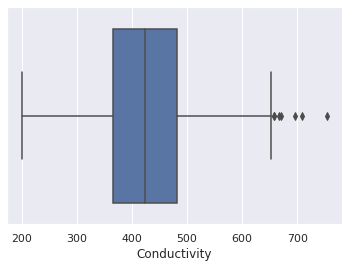

In [372]:
sns.boxplot(data = data, x = "Conductivity")

#### Langkah 1 : Penentuan Hipotesis Nol

Pada soal ini, ditentukan bahwa hipotesis nol ($H_0$) adalah proporsi nilai Conductivity yang lebih dari 450 sama dengan 10%. Oleh karena itu, diambil

$$
H_0: p_{Conductivity} = 10\%
$$

#### Langkah 2: Penentuan Hipotesis Alternatif

Diambil hipotesis alternatif dari permasalahan ini adalah proporsi nilai Conductivity yang lebih dari 450 tidak sama dengan 10%
$$
H_1: p_{Conductivity} \neq 10\%
$$

#### Langkah 3: Penentuan Nilai Signifikansi dan Daerah kritis
Diambil nilai signifikansi ($\alpha$) bernilai 5%. Akan dihitung nilai daerah kritisnya. Dikarenakan dilakukan proses pengujian pada rata-rata, maka digunakanlah distribusi normal.

In [373]:
norm = scipy.stats.norm()
criticalVal = norm.ppf(1-0.05/2)
criticalVal

1.959963984540054

Oleh karena itu, daerah kritisnya adalah
$$
z < -1.960 \lor z > 1.960
$$

#### Langkah 4: Pengujian Statistik

Akan dilakukan pengujian statistik. Perhitungan proporsi akan dilakukan dengan menggunakan pendekatan distribusi normal. Akan dicari simpangan baku dan rata-rata dari distribusi binomial.

Rumus untuk mencari nilai rata-rata dan simpangan baku dari distribusi binomial adalah sebagai berikut:
$$
\mu = np
$$

$$
\sigma = \sqrt{npq}
$$

Selanjutnya akan dicari nilai rata-rata dan simpangan baku yang dibutuhkan dalam perhitungan.

In [374]:
mu = data["Conductivity"].shape[0] * 0.1
sigma = np.sqrt(data["Conductivity"].shape[0]*0.1*0.9)
print(f"Nilai rata-rata = {mu}")
print(f"Nilai simpangan baku = {sigma}")

Nilai rata-rata = 201.0
Nilai simpangan baku = 13.449907062875937


Selanjutnya dihitung jumlah data Conductivity yang lebih dari 450.

In [375]:
cdv_gt_450 = data[data["Conductivity"] > 450]["Conductivity"].size
print(f"Jumlah data Conductivity yang bernilai lebih dari 450: {cdv_gt_450}")

Jumlah data Conductivity yang bernilai lebih dari 450: 745


Berikutnya akan dihitung nilai $z$ untuk mencari distribusi normal pada data Conductivity tersebut. Rumus untuk mencari $z$ tersebut adalah sebagai berikut:

$$
z = \frac{X - \mu}{\sigma}
$$

Di dalam hal ini, $X$ adalah banyaknya data Conductivity yang bernilai lebih dari 450.

In [376]:
z = (cdv_gt_450 - mu)/sigma
z

40.446376131589325

Akan dicari nilai p untuk kasus ini.

In [377]:
p = (1 - norm.cdf(z)) * 2
p

0.0

#### Langkah 5: Pengambilan Keputusan

Dikarenakan $p < 0.05$ dan $z_0 > 1.960$, maka hipotesis $H_0$ ditolak karena berada di daerah kritis. Oleh karena itu, nilai proporsi Conductivity yang lebih dari 450 tidak sama dengan 10%.

### Soal 4.e.

Akan diuji proporsi nilai Trihalomethanes yang kurang dari 40 adalah kurang dari 5%. Berikut ini adalah boxplot dari data Trihalomethanes.

<AxesSubplot:xlabel='Trihalomethanes'>

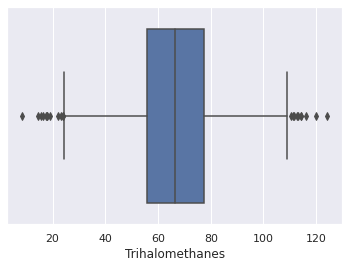

In [378]:
sns.boxplot(data = data, x = "Trihalomethanes")

#### Langkah 1 : Penentuan Hipotesis Nol

Pada soal ini, ditentukan bahwa hipotesis nol ($H_0$) adalah proporsi nilai Trihalomethanes yang kurang dari 40 sama dengan 5%. Oleh karena itu, diambil

$$
H_0: p_{Trihalomethanes} = 5\%
$$

#### Langkah 2: Penentuan Hipotesis Alternatif

Diambil hipotesis alternatif dari permasalahan ini adalah proporsi nilai Trihalomethanes yang kurang dari 40 kurang dari 5%
$$
H_1: p_{Trihalomethanes} < 5\%
$$

#### Langkah 3: Penentuan Nilai Signifikansi dan Daerah kritis
Diambil nilai signifikansi ($\alpha$) bernilai 5%. Akan dihitung nilai daerah kritisnya. Dikarenakan dilakukan proses pengujian pada rata-rata, maka digunakanlah distribusi normal.

In [379]:
norm = scipy.stats.norm()
criticalVal = norm.ppf(0.05)
criticalVal

-1.6448536269514729

Oleh karena itu, daerah kritisnya adalah
$$
z < -1.645
$$

#### Langkah 4: Pengujian Statistik

Akan dilakukan pengujian statistik. Perhitungan proporsi akan dilakukan dengan menggunakan pendekatan distribusi normal. Akan dicari simpangan baku dan rata-rata dari distribusi binomial.

Rumus untuk mencari nilai rata-rata dan simpangan baku dari distribusi binomial adalah sebagai berikut:
$$
\mu = np
$$

$$
\sigma = \sqrt{npq}
$$

Selanjutnya akan dicari nilai rata-rata dan simpangan baku yang dibutuhkan dalam perhitungan.

In [380]:
mu = data["Trihalomethanes"].shape[0] * 0.05
sigma = np.sqrt(data["Trihalomethanes"].shape[0]*0.05*0.95)
print(f"Nilai rata-rata = {mu}")
print(f"Nilai simpangan baku = {sigma}")

Nilai rata-rata = 100.5
Nilai simpangan baku = 9.771130947848361


Selanjutnya dihitung jumlah data Trihalomethanes yang kurang dari 40.

In [381]:
trh_lt_40 = data[data["Trihalomethanes"] < 40]["Trihalomethanes"].size
print(f"Jumlah data Trihalomethanes yang bernilai kurang dari 40: {trh_lt_40}")

Jumlah data Trihalomethanes yang bernilai kurang dari 40: 106


Berikutnya akan dihitung nilai $z$ untuk mencari distribusi normal pada data Trihalomethanes tersebut. Rumus untuk mencari $z$ tersebut adalah sebagai berikut:

$$
z = \frac{X - \mu}{\sigma}
$$

Di dalam hal ini, $X$ adalah banyaknya data Trihalomethanes yang bernilai kurang dari 40.

In [382]:
z = (trh_lt_40 - mu)/sigma
z

0.5628826416670959

Akan dicari nilai p untuk kasus ini.

In [383]:
p = norm.cdf(z)
p

0.7132425995092373

#### Langkah 5: Pengambilan Keputusan

Dikarenakan $p > 0.05$ dan $z_0 > -1.645$, maka hipotesis $H_0$ diterima karena berada di luar daerah kritis. Oleh karena itu, nilai proporsi Trihalomethanes yang kurang dari 40 sama dengan 5%.

## Nomor 5: Uji Hipotesis 2 Sampel

Pada soal ini, kami akan menguji beberapa hipotesis yang melibatkan dua dataset. 

### Soal 5.a.

Pada soal ini, akan diuji apakah rata-rata bagian awal dan bagian akhir kolom sulfate apabila dibagi menjadi 2 sama rata memiliki rata-rata yang sama.
Sebelum itu kami membagi dataset Sulfate menjadi dua bagian sama besar, yaitu sebagai berikut.

In [384]:
SulfateAwal = data["Sulfate"].iloc[:data["Sulfate"].size//2]
SulfateAkhir = data["Sulfate"].iloc[data["Sulfate"].size//2:]
SulfateAwal.info()
SulfateAkhir.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1005 entries, 0 to 1004
Series name: Sulfate
Non-Null Count  Dtype  
--------------  -----  
1005 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1005 entries, 1005 to 2009
Series name: Sulfate
Non-Null Count  Dtype  
--------------  -----  
1005 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


Berikut ini adalah boxplot dari kedua data Sulfate tersebut.

<AxesSubplot:xlabel='Sulfate'>

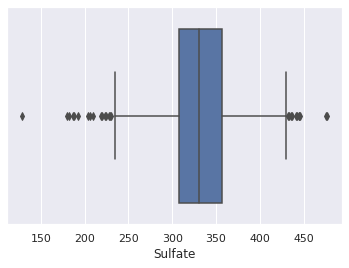

In [385]:
sns.boxplot(x = SulfateAwal)

<AxesSubplot:xlabel='Sulfate'>

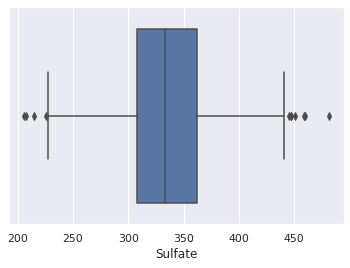

In [386]:
sns.boxplot(x = SulfateAkhir)

Selanjutnya, akan diuji apakah kedua data Sulfate tersebut memiliki rata-rata yang sama.

#### Langkah 1 : Penentuan Hipotesis Nol

Pada soal ini, ditentukan bahwa hipotesis nol ($H_0$) adalah rata-rata Sulfate awal dan Sulfate akhir adalah sama. Oleh karena itu, diambil

$$
H_0: \mu_{SulfateAwal} - \mu_{SulfateAkhir} = 0
$$

#### Langkah 2: Penentuan Hipotesis Alternatif

Diambil hipotesis alternatif dari permasalahan ini adalah rata-rata Sulfate awal dan Sulfate akhir berbeda. Oleh karena itu diambil

$$
H_1: \mu_{SulfateAwal} - \mu_{SulfateAkhir} \neq 0
$$

#### Langkah 3: Penentuan Nilai Signifikansi dan Daerah kritis
Diambil nilai signifikansi ($\alpha$) bernilai 5%. Akan dihitung nilai daerah kritisnya. Dikarenakan dilakukan proses pengujian pada rata-rata, maka digunakanlah distribusi t.

Sebelumnya, akan dihitung terlebih dahulu nilai derajat kebebasan dari dua buah sampel. Berikut ini adalah rumus untuk menghitung derajat kebebasan.

$$
v = n_1 + n_2 - 2
$$

Berikut ini adalah perhitungannya menggunakan python

In [387]:
v_sulfate = SulfateAwal.count() + SulfateAkhir.count() - 2
v_sulfate

2008

Selanjutnya akan dihitung nilai titik kritisnya untuk mencari daerah kritisnya.

In [388]:
tValue = scipy.stats.t.ppf(0.05/2, v_sulfate)
tValue

-1.961146094844425

Oleh karena itu, daerah kritisnya adalah
$$
t < - 1.961 \lor t > 1.961
$$

#### Langkah 4: Pengujian Statistik

Akan dilakukan pengujian statistik. Akan dihitung nilai berikut
$$
t_0 = \frac{(\bar{x}_1 - \bar{x}_2) - d_0}{s_p\sqrt{1/n_1 + 1/n_2}}
$$

yang dalam hal ini, $\bar{x}_1$ menyatakan rata-rata sampel dari dataset pertama (SulfateAwal) dan $\bar{x}_2$ menyatakan rata-rata dari dataset kedua (SulfateAkhir) dan $s_p$ menyatakan simpangan baku gabungan dari kedua sampel. Nilai $s_p$ dapat dihitung dengan rumus berikut.

$$
s_p^2 = \frac{(n_1 - 1)s_1^2+(n_2 - 1)s_2^2}{n_1+n_2 -2}
$$

Berikut ini adalah perhitungan nilai $s_p$

In [389]:
n1 = SulfateAwal.count()
n2 = SulfateAkhir.count()
s1_sqr = SulfateAwal.var(ddof=1)
s2_sqr = SulfateAkhir.var(ddof=1)

In [390]:
sp_sqr = (((n1-1)*s1_sqr)+((n2-1)*s2_sqr))/(n1+n2-2)
sp = np.sqrt(sp_sqr)
sp

41.1772368337153

Selanjutnya akan dihitung nilai $t_0$

In [391]:
x1_bar = np.mean(SulfateAwal)
x2_bar = np.mean(SulfateAkhir)

In [392]:
t0 = (x1_bar - x2_bar - 0)/(sp*np.sqrt(1/n1+1/n2))
t0

-2.0752690696871983

Akan dihitung nilai $p$ dari data yang diketahui diatas

In [393]:
p = scipy.stats.t.cdf(t0,  v_sulfate) * 2
p

0.03808865190737513

#### Langkah 5: Pengambilan Keputusan

Dikarenakan $p = 0.038 < 0.05$ dan $t_0 = -2.075 < -1.961$, maka hipotesis $H_0$ tertolak. Oleh karena itu, nilai rata-rata kedua dataset tersebut berbeda.

### Soal 5.b.

Pada soal ini, akan diuji apakah rata-rata bagian awal dan bagian akhir kolom OrganicCarbon apabila dibagi menjadi 2 sama rata memiliki rata-rata bagian awal yang lebih besar dari pada bagian akhir sebesar 0.15.
Sebelum itu kami membagi dataset OrganicCarbon menjadi dua bagian sama besar, yaitu sebagai berikut.

In [394]:
OrganicCarbonAwal = data["OrganicCarbon"].iloc[:data["OrganicCarbon"].size//2]
OrganicCarbonAkhir = data["OrganicCarbon"].iloc[data["OrganicCarbon"].size//2:]
OrganicCarbonAwal.info()
OrganicCarbonAkhir.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1005 entries, 0 to 1004
Series name: OrganicCarbon
Non-Null Count  Dtype  
--------------  -----  
1005 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1005 entries, 1005 to 2009
Series name: OrganicCarbon
Non-Null Count  Dtype  
--------------  -----  
1005 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


Berikut ini adalah boxplot dari kedua data OrganicCarbon tersebut.

<AxesSubplot:xlabel='OrganicCarbon'>

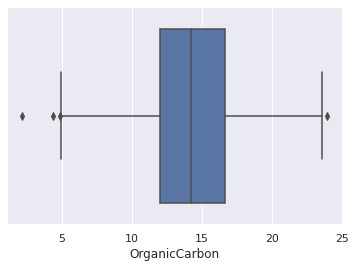

In [395]:
sns.boxplot(x = OrganicCarbonAwal)

<AxesSubplot:xlabel='OrganicCarbon'>

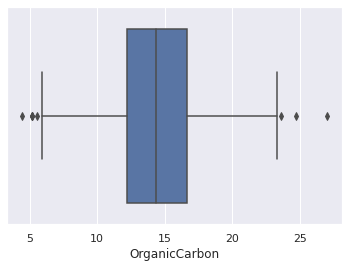

In [396]:
sns.boxplot(x = OrganicCarbonAkhir)

Selanjutnya, akan diuji apakah kedua data OrganicCarbon tersebut memiliki beda antara bagian awal dan bagian akhir sama dengan 0.15

#### Langkah 1 : Penentuan Hipotesis Nol

Pada soal ini, ditentukan bahwa hipotesis nol ($H_0$) adalah rata-rata OrganicCarbon awal dan OrganicCarbon akhir adalah lebih besar OrganicCarbon awal sebesar 0.15. Oleh karena itu, diambil

$$
H_0: \mu_{OrganicCarbonAwal} - \mu_{OrganicCarbonAkhir} = 0.15
$$

#### Langkah 2: Penentuan Hipotesis Alternatif

Diambil hipotesis alternatif dari permasalahan ini adalah  beda rata-rata OrganicCarbon awal dan OrganicCarbon akhir tidak sama dengan 0.15. Oleh karena itu diambil

$$
H_1: \mu_{OrganicCarbonAwal} - \mu_{OrganicCarbonAkhir} \neq 0.15
$$

#### Langkah 3: Penentuan Nilai Signifikansi dan Daerah kritis
Diambil nilai signifikansi ($\alpha$) bernilai 5%. Akan dihitung nilai daerah kritisnya. Dikarenakan dilakukan proses pengujian pada rata-rata, maka digunakanlah distribusi t.

Sebelumnya, akan dihitung terlebih dahulu nilai derajat kebebasan dari dua buah sampel. Berikut ini adalah rumus untuk menghitung derajat kebebasan.

$$
v = n_1 + n_2 - 2
$$

Berikut ini adalah perhitungannya menggunakan python

In [397]:
v_OrganicCarbon = OrganicCarbonAwal.count() + OrganicCarbonAkhir.count() - 2
v_OrganicCarbon

2008

Selanjutnya akan dihitung nilai titik kritisnya untuk mencari daerah kritisnya.

In [398]:
tValue = scipy.stats.t.ppf(0.05/2, v_OrganicCarbon)
tValue

-1.961146094844425

Oleh karena itu, daerah kritisnya adalah
$$
t < - 1.961 \lor t > 1.961
$$

#### Langkah 4: Pengujian Statistik

Akan dilakukan pengujian statistik. Akan dihitung nilai berikut
$$
t_0 = \frac{(\bar{x}_1 - \bar{x}_2) - d_0}{s_p\sqrt{1/n_1 + 1/n_2}}
$$

yang dalam hal ini, $\bar{x}_1$ menyatakan rata-rata sampel dari dataset pertama (OrganicCarbonAwal) dan $\bar{x}_2$ menyatakan rata-rata dari dataset kedua (OrganicCarbonAkhir) dan $s_p$ menyatakan simpangan baku gabungan dari kedua sampel. Nilai $s_p$ dapat dihitung dengan rumus berikut.

$$
s_p^2 = \frac{(n_1 - 1)s_1^2+(n_2 - 1)s_2^2}{n_1+n_2 -2}
$$

Berikut ini adalah perhitungan nilai $s_p$

In [399]:
n1 = OrganicCarbonAwal.count()
n2 = OrganicCarbonAkhir.count()
s1_sqr = OrganicCarbonAwal.var(ddof=1)
s2_sqr = OrganicCarbonAkhir.var(ddof=1)

In [400]:
sp_sqr = (((n1-1)*s1_sqr)+((n2-1)*s2_sqr))/(n1+n2-2)
sp = np.sqrt(sp_sqr)
sp

3.324971353803503

Selanjutnya akan dihitung nilai $t_0$

In [401]:
x1_bar = np.mean(OrganicCarbonAwal)
x2_bar = np.mean(OrganicCarbonAkhir)

In [402]:
t0 = (x1_bar - x2_bar - 0.15)/(sp*np.sqrt(1/n1+1/n2))
t0

-2.413145517798807

Akan dihitung nilai $p$ dari data yang diketahui diatas

In [403]:
p = scipy.stats.t.cdf(t0,  v_OrganicCarbon) * 2
p

0.01590454911867324

#### Langkah 5: Pengambilan Keputusan

Dikarenakan $p = 0.016 < 0.05$ dan $t_0 = -2.413 < -1.961$, maka hipotesis $H_0$ ditolak. Oleh karena itu, nilai rata-rata bagian awal dan bagian akhir kolom OrganicCarbon memiliki beda yang tidak sama dengan 0.15

### Soal 5.c.

Pada soal ini, akan diuji apakah rata-rata 100 data bagian awal dan 100 data bagian akhir kolom Chloramines memiliki rata-rata yang sama.
Sebelum itu kami membagi dataset Chloramines menjadi dua bagian, yaitu sebagai berikut.

In [404]:
ChloraminesAwal = data["Chloramines"].iloc[:100]
ChloraminesAkhir = data["Chloramines"].iloc[-100:]
ChloraminesAwal.info()
ChloraminesAkhir.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: Chloramines
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 928.0 bytes
<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 1910 to 2009
Series name: Chloramines
Non-Null Count  Dtype  
--------------  -----  
100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes


Berikut ini adalah boxplot dari kedua data Chloramines tersebut.

<AxesSubplot:xlabel='Chloramines'>

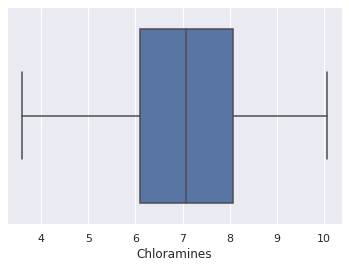

In [405]:
sns.boxplot(x = ChloraminesAwal)

<AxesSubplot:xlabel='Chloramines'>

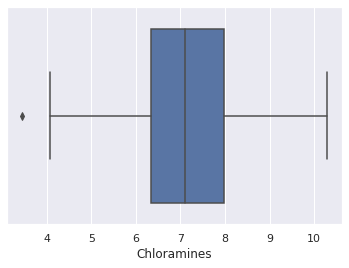

In [406]:
sns.boxplot(x = ChloraminesAkhir)

Selanjutnya, akan diuji apakah kedua data Chloramines tersebut memiliki rata-rata yang sama.

#### Langkah 1 : Penentuan Hipotesis Nol

Pada soal ini, ditentukan bahwa hipotesis nol ($H_0$) adalah rata-rata 100 data Chloramines awal dan 100 data Chloramines akhir adalah sama. Oleh karena itu, diambil

$$
H_0: \mu_{ChloraminesAwal} - \mu_{ChloraminesAkhir} = 0
$$

#### Langkah 2: Penentuan Hipotesis Alternatif

Diambil hipotesis alternatif dari permasalahan ini adalah rata-rata 100 data Chloramines awal dan 100 data Chloramines akhir berbeda. Oleh karena itu diambil

$$
H_1: \mu_{ChloraminesAwal} - \mu_{ChloraminesAkhir} \neq 0
$$

#### Langkah 3: Penentuan Nilai Signifikansi dan Daerah kritis
Diambil nilai signifikansi ($\alpha$) bernilai 5%. Akan dihitung nilai daerah kritisnya. Dikarenakan dilakukan proses pengujian pada rata-rata, maka digunakanlah distribusi t.

Sebelumnya, akan dihitung terlebih dahulu nilai derajat kebebasan dari dua buah sampel. Berikut ini adalah rumus untuk menghitung derajat kebebasan.

$$
v = n_1 + n_2 - 2
$$

Berikut ini adalah perhitungannya menggunakan python

In [407]:
v_Chloramines = ChloraminesAwal.count() + ChloraminesAkhir.count() - 2
v_Chloramines

198

Selanjutnya akan dihitung nilai titik kritisnya untuk mencari daerah kritisnya.

In [408]:
tValue = scipy.stats.t.ppf(0.05/2, v_Chloramines)
tValue

-1.972017477833896

Oleh karena itu, daerah kritisnya adalah
$$
t < - 1.972 \lor t > 1.972
$$

#### Langkah 4: Pengujian Statistik

Akan dilakukan pengujian statistik. Akan dihitung nilai berikut
$$
t_0 = \frac{(\bar{x}_1 - \bar{x}_2) - d_0}{s_p\sqrt{1/n_1 + 1/n_2}}
$$

yang dalam hal ini, $\bar{x}_1$ menyatakan rata-rata sampel dari 100 data pertama (ChloraminesAwal) dan $\bar{x}_2$ menyatakan rata-rata dari 100 data akhir (ChloraminesAkhir) dan $s_p$ menyatakan simpangan baku gabungan dari kedua sampel. Nilai $s_p$ dapat dihitung dengan rumus berikut.

$$
s_p^2 = \frac{(n_1 - 1)s_1^2+(n_2 - 1)s_2^2}{n_1+n_2 -2}
$$

Berikut ini adalah perhitungan nilai $s_p$

In [409]:
n1 = ChloraminesAwal.count()
n2 = ChloraminesAkhir.count()
s1_sqr = ChloraminesAwal.var(ddof=1)
s2_sqr = ChloraminesAkhir.var(ddof=1)

In [410]:
sp_sqr = (((n1-1)*s1_sqr)+((n2-1)*s2_sqr))/(n1+n2-2)
sp = np.sqrt(sp_sqr)
sp

1.396564491851799

Selanjutnya akan dihitung nilai $t_0$

In [411]:
x1_bar = np.mean(ChloraminesAwal)
x2_bar = np.mean(ChloraminesAkhir)

In [412]:
t0 = (x1_bar - x2_bar - 0)/(sp*np.sqrt(1/n1+1/n2))
t0

-0.7059424842236872

Akan dihitung nilai $p$ dari data yang diketahui diatas

In [413]:
p = scipy.stats.t.cdf(t0,  v_Chloramines) * 2
p

0.48105368584331587

#### Langkah 5: Pengambilan Keputusan

Dikarenakan $p = 0.481 > 0.05$ dan $t_0 = -0.706 > -1.972$ dan $t_0 = -0.706 < 1.972$, maka hipotesis $H_0$ diterima. Oleh karena itu, nilai rata-rata 100 data pertama dan 100 data terakhir Chloramines tersebut sama.

### Soal 5.d.

Pada soal ini, akan diuji apakah proporsi bagian awal dan bagian akhir kolom sulfate apabila dibagi menjadi 2 sama rata memiliki proporsi nilai bagian awal Turbidity yang lebih dari 4 lebih besar daripada bagian akhir.
Sebelum itu kami membagi dataset Turbidity menjadi dua bagian sama besar, yaitu sebagai berikut.

In [414]:
TurbidityAwal = data["Turbidity"].iloc[:data["Turbidity"].size//2]
TurbidityAkhir = data["Turbidity"].iloc[data["Turbidity"].size//2:]
TurbidityAwal.info()
TurbidityAkhir.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1005 entries, 0 to 1004
Series name: Turbidity
Non-Null Count  Dtype  
--------------  -----  
1005 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1005 entries, 1005 to 2009
Series name: Turbidity
Non-Null Count  Dtype  
--------------  -----  
1005 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


Berikut ini adalah boxplot dari kedua data Sulfate tersebut.

<AxesSubplot:xlabel='Turbidity'>

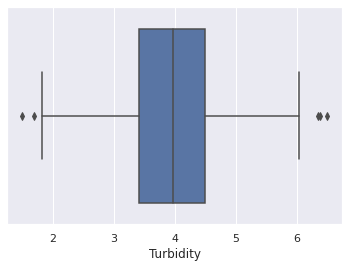

In [415]:
sns.boxplot(x = TurbidityAwal)

<AxesSubplot:xlabel='Turbidity'>

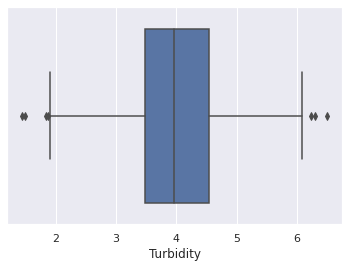

In [416]:
sns.boxplot(x = TurbidityAkhir)

Selanjutnya, akan diuji apakah kedua data Turbidity tersebut memiliki proporsi yang sama

#### Langkah 1 : Penentuan Hipotesis Nol

Pada soal ini, ditentukan bahwa hipotesis nol ($H_0$) adalah proporsi Turbidity awal yang lebih dari 4 dan Turbidity akhir yang lebih dari 4 adalah sama. Oleh karena itu, diambil

$$
H_0: p_{TurbidityAwal} - p_{TurbidityAkhir} = 0
$$

#### Langkah 2: Penentuan Hipotesis Alternatif

Diambil hipotesis alternatif dari permasalahan ini adalah proporsi Turbidity awal yang lebih dari 4 lebih besar dari Turbidity akhir yang lebih dari 4. Oleh karena itu diambil

$$
H_1: p_{TurbidityAwal} - p_{TurbidityAkhir} > 0
$$

#### Langkah 3: Penentuan Nilai Signifikansi dan Daerah kritis
Diambil nilai signifikansi ($\alpha$) bernilai 5%. Akan dihitung nilai daerah kritisnya. Dikarenakan dilakukan proses pengujian pada rata-rata, maka digunakanlah distribusi normal (z).

Selanjutnya akan dihitung nilai titik kritisnya untuk mencari daerah kritisnya.

In [417]:
norm = scipy.stats.norm()
z_value = norm.ppf(1-0.05)
z_value

1.6448536269514722

Oleh karena itu, daerah kritisnya adalah
$$
z > 1.645
$$

#### Langkah 4: Pengujian Statistik

Akan dilakukan pengujian statistik. Akan dihitung nilai berikut
$$
z_0 = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}\hat{q}(1/n_1+1/n_2)}}
$$

yang dalam hal ini, $\hat{p}_1$ menyatakan proporsi sampel pertama (TurbidityAwal) dan $\hat{p}_2$ menyatakan proporsi dari sampel kedua (TurbidityAkhir) dan $\hat{p}$ menyatakan proporsi gabungan dari kedua sampel, sedangkan $\hat{q}$ menyatakan nilai $1 - \hat{p}$. Nilai $\hat{p}$ dapat dihitung dengan rumus berikut.

$$
\hat{p} = \frac{x_1+x_2}{n_1+n_2}
$$

Berikut ini adalah perhitungan nilai $\hat{p}$

In [418]:
x1 = TurbidityAwal[TurbidityAwal > 4].count()
x2 = TurbidityAkhir[TurbidityAkhir > 4].count()
n1 = TurbidityAwal.count()
n2 = TurbidityAkhir.count()

In [419]:
hat_p = (x1+x2)/(n1+n2)
hat_p

0.48507462686567165

Selanjutnya akan dihitung nilai $p_1$, $p_2$, dan nilai $q$.

In [420]:
p1 = x1/n1
p2 = x2/n2
q = 1 - p

Selanjutnya akan dihitung nilai $z_0$

In [421]:
z0 = (p1 - p2)/(np.sqrt(hat_p*q*(1/n1+1/n2)))
z0

-0.13336987097338307

Akan dihitung nilai $p$ dari data yang diketahui diatas

In [422]:
p = 1 - norm.cdf(z0)
p

0.5530495640039329

#### Langkah 5: Pengambilan Keputusan

Dikarenakan $p = 0.553 > 0.05$ dan $z_0 = -0.133 < 1.645$, maka hipotesis $H_0$ diterima. Oleh karena itu, nilai proporsi keduanya adalah sama.

### Soal 5.e.

Pada soal ini, akan diuji apakah variansi bagian awal dan bagian akhir kolom sulfate apabila dibagi menjadi 2 sama rata memiliki rata-rata yang sama.
Sebelum itu kami membagi dataset Sulfate menjadi dua bagian sama besar, yaitu sebagai berikut.

In [423]:
SulfateAwal = data["Sulfate"].iloc[:data["Sulfate"].size//2]
SulfateAkhir = data["Sulfate"].iloc[data["Sulfate"].size//2:]
SulfateAwal.info()
SulfateAkhir.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1005 entries, 0 to 1004
Series name: Sulfate
Non-Null Count  Dtype  
--------------  -----  
1005 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB
<class 'pandas.core.series.Series'>
RangeIndex: 1005 entries, 1005 to 2009
Series name: Sulfate
Non-Null Count  Dtype  
--------------  -----  
1005 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


Berikut ini adalah boxplot dari kedua data Sulfate tersebut.

<AxesSubplot:xlabel='Sulfate'>

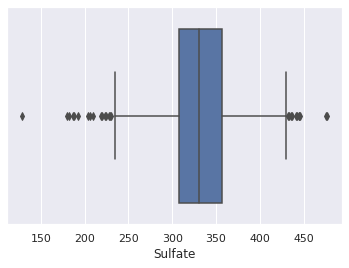

In [424]:
sns.boxplot(x = SulfateAwal)

<AxesSubplot:xlabel='Sulfate'>

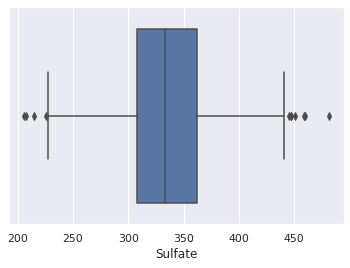

In [425]:
sns.boxplot(x = SulfateAkhir)

Selanjutnya, akan diuji apakah kedua data Sulfate tersebut memiliki rata-rata yang sama.

#### Langkah 1 : Penentuan Hipotesis Nol

Pada soal ini, ditentukan bahwa hipotesis nol ($H_0$) adalah variansi Sulfate awal dan Sulfate akhir adalah sama. Oleh karena itu, diambil

$$
H_0: \sigma^2_{SulfateAwal} = \sigma^2_{SulfateAkhir}
$$

#### Langkah 2: Penentuan Hipotesis Alternatif

Diambil hipotesis alternatif dari permasalahan ini adalah variansi Sulfate awal dan Sulfate akhir berbeda. Oleh karena itu diambil

$$
H_1: \sigma^2_{SulfateAwal} \neq \sigma^2_{SulfateAkhir} 
$$

#### Langkah 3: Penentuan Nilai Signifikansi dan Daerah kritis
Diambil nilai signifikansi ($\alpha$) bernilai 5%. Akan dihitung nilai daerah kritisnya. Dikarenakan dilakukan proses pengujian pada rata-rata, maka digunakanlah distribusi f.

Sebelumnya, akan dihitung terlebih dahulu nilai derajat kebebasan $v_1$ dan $v_2$. Berikut ini adalah rumus untuk menghitung derajat kebebasan tersebut.

$$
v_1 = n_1 - 1
$$
$$
v_2 = n_2 - 1
$$

Berikut ini adalah perhitungannya menggunakan python

In [426]:
v1 = SulfateAwal.count() - 1
v2 = SulfateAkhir.count() - 1
print(v1)
print(v2)

1004
1004


Selanjutnya akan dihitung nilai titik kritisnya untuk mencari daerah kritisnya.

In [427]:
fAwal = scipy.stats.f.ppf(0.05/2, v1, v2)
fAkhir = scipy.stats.f.ppf(1 - 0.05/2, v1, v2)
print(f'fAwal = {fAwal}')
print(f'fAkhir = {fAkhir}')

fAwal = 0.883572344355818
fAkhir = 1.1317692392568777


Oleh karena itu, daerah kritisnya adalah
$$
f < 0.884 \lor f > 1.132
$$

#### Langkah 4: Pengujian Statistik

Akan dilakukan pengujian statistik. Akan dihitung nilai berikut
$$
f_0 = \frac{s_1^2}{s_2^2}
$$

yang dalam hal ini, $s_1^2$ menyatakan variansi sampel dari dataset pertama (SulfateAwal) dan $s_2^2$ menyatakan variansi dari dataset kedua (SulfateAkhir).

Berikut ini adalah perhitungan nilai $f_0$

In [428]:
s1_sqr = SulfateAwal.var(ddof=1)
s2_sqr = SulfateAkhir.var(ddof=1)

In [429]:
f0 = s1_sqr/s2_sqr
f0

1.0152511043950063

#### Langkah 5: Pengambilan Keputusan

Dikarenakan $f_0 = 1.015 > 0.884$ dan $f_0 = 1.015 < 1.132$ maka hipotesis $f_0$ berada di luar titik kritis, sehingga hipotesis $H_0$ diterima.

Jadi, kesimpulannya adalah variansi dari kedua data tersebut adalah sama.

## Nomor 6: Korelasi

Dua buah dataset dapat memiliki satu sama lain. Nilai koefisien korelasi dua dataset tersebut menyatakan bagaimana dua buah data saling berkorelasi satu sama lain. Rumus yang menyatakan korelasi dari data adalah sebagai berikut.

$$
\rho_{xy} = \frac{n\sum{x_iy_i}-\sum{x_i}\sum{y_i}}{\sqrt{\sum{x_i^2}-(\sum{x_i})^2}\cdot\sqrt{\sum{y_i^2}-(\sum{y_i})^2}} = \frac{\sigma_{xy}}{\sigma_x\sigma_y}
$$


Nilai $\rho_{xy}$ menentukan korelasi antara dua buah data. Berikut ini adalah cara memaknai nilai koefisien korelasi tersebut.

- Semakin nilai $\rho_{xy}$ mendekati 0, kedua kolom tidak berkorelasi.
- Semakin nilai $\rho_{xy}$ mendekati 1, kedua kolom berbanding lurus.
- Semakin nilai $\rho_{xy}$ mendekati -1, kedua kolom berbanding terbalik.

### Korelasi Data pH dan Potability

Berikut ini adalah scatter plot dari data pH dengan Potability.

<AxesSubplot:xlabel='pH', ylabel='Potability'>

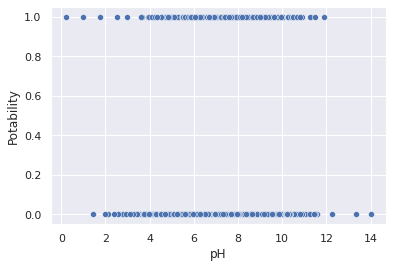

In [430]:
sns.scatterplot(x = "pH", y = "Potability", data = data)

Selanjutnya akan dihitung nilai koefisien korelasi antarkeduanya menggunakan python.

In [431]:
data["pH"].corr(data["Potability"])

0.015475094408433492

Nilai koefisien korelasi pH dan potability mendekati nol. Oleh karena itu, kedua atribut tersebut tidak memiliki korelasi.

### Korelasi Data Hardness dan Potability

Berikut ini adalah scatter plot dari data Hardness dengan Potability.

<AxesSubplot:xlabel='Hardness', ylabel='Potability'>

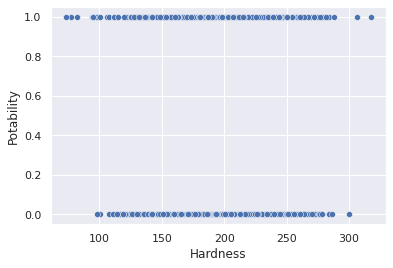

In [432]:
sns.scatterplot(x = "Hardness", y = "Potability", data = data)

Selanjutnya akan dihitung nilai koefisien korelasi antarkeduanya menggunakan python.

In [433]:
data["Hardness"].corr(data["Potability"])

-0.0014631528959479442

Nilai koefisien korelasi Hardness dan potability mendekati nol. Oleh karena itu, kedua atribut tersebut tidak memiliki korelasi.

### Korelasi Data Solids dan Potability

Berikut ini adalah scatter plot dari data Solids dengan Potability.

<AxesSubplot:xlabel='Solids', ylabel='Potability'>

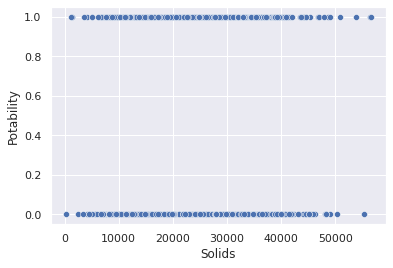

In [434]:
sns.scatterplot(x = "Solids", y = "Potability", data = data)

Selanjutnya akan dihitung nilai koefisien korelasi antarkeduanya menggunakan python.

In [435]:
data["Solids"].corr(data["Potability"])

0.0389765781817347

Nilai koefisien korelasi Solids dan potability mendekati nol. Oleh karena itu, kedua atribut tersebut tidak memiliki korelasi.

### Korelasi Data Chloramines dan Potability

Berikut ini adalah scatter plot dari data Chloramines dengan Potability.

<AxesSubplot:xlabel='Chloramines', ylabel='Potability'>

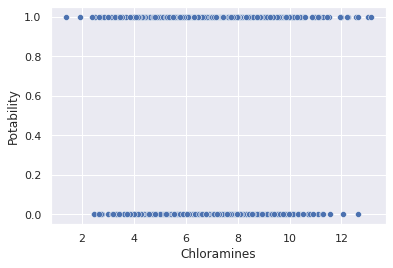

In [436]:
sns.scatterplot(x = "Chloramines", y = "Potability", data = data)

Selanjutnya akan dihitung nilai koefisien korelasi antarkeduanya menggunakan python.

In [437]:
data["Chloramines"].corr(data["Potability"])

0.020778921840524087

Nilai koefisien korelasi Chloramines dan potability mendekati nol. Oleh karena itu, kedua atribut tersebut tidak memiliki korelasi.

### Korelasi Data Sulfate dan Potability

Berikut ini adalah scatter plot dari data Sulfate dengan Potability.

<AxesSubplot:xlabel='Sulfate', ylabel='Potability'>

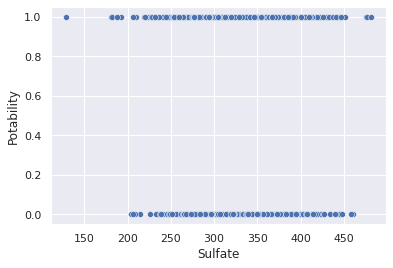

In [438]:
sns.scatterplot(x = "Sulfate", y = "Potability", data = data)

Selanjutnya akan dihitung nilai koefisien korelasi antarkeduanya menggunakan python.

In [439]:
data["Sulfate"].corr(data["Potability"])

-0.01570316441927379

Nilai koefisien korelasi Sulfate dan potability mendekati nol. Oleh karena itu, kedua atribut tersebut tidak memiliki korelasi.

### Korelasi Data Conductivity dan Potability

Berikut ini adalah scatter plot dari data Conductivity dengan Potability.

<AxesSubplot:xlabel='Conductivity', ylabel='Potability'>

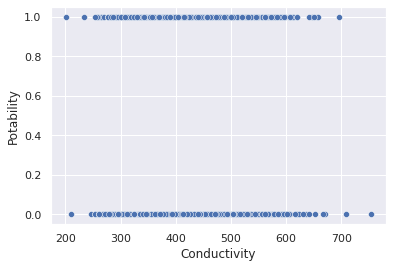

In [440]:
sns.scatterplot(x = "Conductivity", y = "Potability", data = data)

Selanjutnya akan dihitung nilai koefisien korelasi antarkeduanya menggunakan python.

In [441]:
data["Conductivity"].corr(data["Potability"])

-0.016257120111377105

Nilai koefisien korelasi Conductivity dan potability mendekati nol. Oleh karena itu, kedua atribut tersebut tidak memiliki korelasi.

### Korelasi Data OrganicCarbon dan Potability

Berikut ini adalah scatter plot dari data OrganicCarbon dengan Potability.

<AxesSubplot:xlabel='OrganicCarbon', ylabel='Potability'>

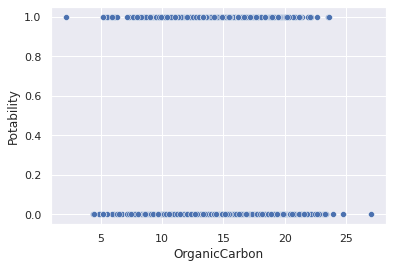

In [442]:
sns.scatterplot(x = "OrganicCarbon", y = "Potability", data = data)

Selanjutnya akan dihitung nilai koefisien korelasi antarkeduanya menggunakan python.

In [443]:
data["OrganicCarbon"].corr(data["Potability"])

-0.015488461910747282

Nilai koefisien korelasi OrganicCarbon dan potability mendekati nol. Oleh karena itu, kedua atribut tersebut tidak memiliki korelasi.

### Korelasi Data Trihalomethanes dan Potability

Berikut ini adalah scatter plot dari data Trihalomethanes dengan Potability.

<AxesSubplot:xlabel='Trihalomethanes', ylabel='Potability'>

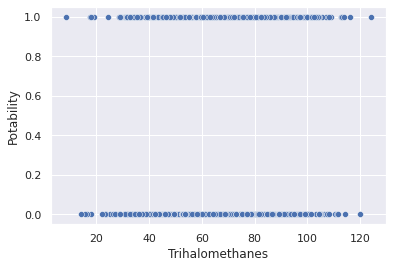

In [444]:
sns.scatterplot(x = "Trihalomethanes", y = "Potability", data = data)

Selanjutnya akan dihitung nilai koefisien korelasi antarkeduanya menggunakan python.

In [445]:
data["Trihalomethanes"].corr(data["Potability"])

0.009236711064713004

Nilai koefisien korelasi Trihalomethanes dan potability mendekati nol. Oleh karena itu, kedua atribut tersebut tidak memiliki korelasi.

### Korelasi Data Turbidity dan Potability

Berikut ini adalah scatter plot dari data Turbidity dengan Potability.

<AxesSubplot:xlabel='Turbidity', ylabel='Potability'>

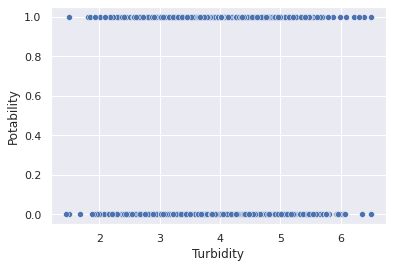

In [446]:
sns.scatterplot(x = "Turbidity", y = "Potability", data = data)

Selanjutnya akan dihitung nilai koefisien korelasi antarkeduanya menggunakan python.

In [447]:
data["Turbidity"].corr(data["Potability"])

0.022331042640622675

Nilai koefisien korelasi Turbidity dan potability mendekati nol. Oleh karena itu, kedua atribut tersebut tidak memiliki korelasi.